## TODO

- get the individual answers going: sample the sigmoidal at specific timepoins with an (ex-)Gaussian
- include ymin and ymax
- plot the boundary distributions
- get boundary distribution from PPS directly
- simulate some psilo participants with plausible priors
- draw graphs
- check out the neural receptor field stuff: Peripersonal space (PPS) as a multisensory interface between the individual and the environment, defining the space of the self, Andrea Serino an doc of the SM to the 2015 article. see also the tool use effect, looks similar to ours and explained by strenghtening of synapses from neurons with receptive fields farther out towards multisensory neurons, thus increasing the PPS (fig 3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [ ]:
def yx( ymin = .25, ymax = .35):
    
    return y

In [7]:
np.e

2.718281828459045

In [8]:
x = Symbol('x')
ymin = Symbol('ymin')
ymax = Symbol('ymax')
xc = Symbol('xc')
b = Symbol('b')

f = (ymin + ymax * np.e ** ((x-xc)/b))/1+np.e**((x-xc)/b)
f.diff(x)

1.0*2.71828182845905**((x - xc)/b)*ymax/b + 1.0*2.71828182845905**((x - xc)/b)/b

# $y(x) = \frac{y_{min} + y_{max} * e^{(x-x_c)/b}}{1 + e^{(x-x_c)/b}}$

is equivalent to:

# $y(x) = y_{min} + \frac{y_{min} + y_{max}}{1 + e^{-(x-x_c)/b}}$

$y(x)$ is RT \
$x$ is distance \
$x_c$ is the center of the sigmoid curve \
$b$ is the slope of the curve at the center \

Simplified, leaving out the min value:
# $y(x) = \frac{y_{max}}{1 + e^{-(x-x_c)/b}}$

allows for:
# $logit(y(x)) = log(y_{max}) + k (x-x_c)$
where $k = \frac{1}{b}$

In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.special import logit, expit
from theano import tensor as tt

def tlogit(x, L = None):
    if L == None:
        return 1 / (1 + tt.exp(-x))
    else:
        return L / (1 + tt.exp(-x))

In [6]:
x = np.linspace(0, 6, 6)
x

array([0. , 1.2, 2.4, 3.6, 4.8, 6. ])

In [52]:
# in terms of normally distributed PPS boundary with x_c as mean and b as std/k as tau
x = np.linspace(0, 6, 6)
#x = np.tile(np.linspace(0, 6, 6), 10).reshape(10,6)

with pm.Model() as model1:

    y_max = 1
    y_min = 0.5
    
    b = pm.Exponential('b', 1)
    x_c = pm.Normal('x_c', mu = 3, tau = 1)
    
#    linerpredi = alpha[sbjid] + beta[sbjid] * (xij - xvect)
    linerpredi = np.log(y_max) + 1/b * (x - x_c)
#    linerpredi = np.log(y_min) + np.log(y_max-y_min) + 1/b * (x - x_c)

#    thetaij = pm.Deterministic("thetaij", tlogit(linerpredi))
    mu_y = pm.Deterministic("mu_y", tlogit(linerpredi, L = y_max))
    
    #y = pm.Normal("y", mu = mu_y, tau=0.001)
    #prior_checks = pm.sample_prior_predictive(samples=50)
    prior_psilo = pm.sample_prior_predictive(samples=50)

In [57]:
# in terms of normally distributed PPS boundary with x_c as mean and b as std/k as tau
x = np.linspace(0, 6, 6)
#x = np.tile(np.linspace(0, 6, 6), 10).reshape(10,6)

with pm.Model() as model1:

    y_max = 1
    y_min = 0.5
    
    b = pm.Exponential('b', 3)
    x_c = pm.Normal('x_c', mu = 3, tau = 1000)
    
#    linerpredi = alpha[sbjid] + beta[sbjid] * (xij - xvect)
    linerpredi = np.log(y_max) + 1/b * (x - x_c)
#    linerpredi = np.log(y_min) + np.log(y_max-y_min) + 1/b * (x - x_c)

#    thetaij = pm.Deterministic("thetaij", tlogit(linerpredi))
    mu_y = pm.Deterministic("mu_y", tlogit(linerpredi, L = y_max))
    
    #y = pm.Normal("y", mu = mu_y, tau=0.001)
    #prior_checks = pm.sample_prior_predictive(samples=50)
    prior_placebo = pm.sample_prior_predictive(samples=50)


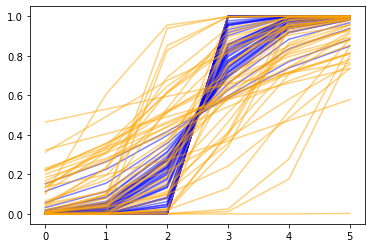

In [58]:
plt.plot(prior_placebo["mu_y"].T, color = 'blue', alpha = 0.5)
plt.plot(prior_psilo["mu_y"].T, color = 'orange', alpha = 0.5)

In [62]:
x = np.tile(np.linspace(0, 6, 6), 10).reshape(10,6)

x

array([[0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ],
       [0. , 1.2, 2.4, 3.6, 4.8, 6. ]])

In [77]:
prior_checks['mu_y'].shape

(50, 10, 6)

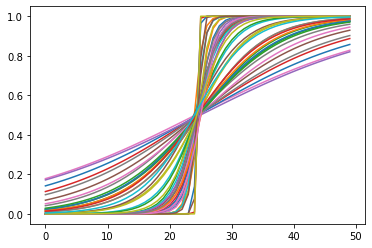

In [19]:
plt.plot(prior_checks['mu_y'].T)
#plt.plot(prior_checks['mu_y'][:,2,:].T)

In [27]:
# todo fix this again
with pm.Model() as model2:
    #means = [pm.Normal(f"y_{i}", mu=μ_m, sigma=μ_s) for i in range(len(mu_y))]
    means = prior_checks['mu_y'].T[:,2] # picking one sigmoid
    #std = pm.Exponential('sd', 1)
    # rt as normal
    #rt_trials = [pm.Normal(f"y_{i}", mu=means[i], tau = 10) for i in range(len(means))]

    # rt as ex-gaussian
    rt_trials = [pm.ExGaussian(f"y_{i}", mu=means[i], sigma = 0.01, nu = 0.1) for i in range(len(means))]

    prior_rts = pm.sample_prior_predictive(samples=50)

In [24]:
prior_rts

{'y_4': array([0.02312104, 0.12005914, 0.3190452 , 0.20852647, 0.11355703,
        0.2488285 , 0.04394091, 0.20848409, 0.0612103 , 0.16200516,
        0.1089267 , 0.11205805, 0.17461747, 0.09665179, 0.04110337,
        0.10735763, 0.04540032, 0.13223269, 0.03614095, 0.03545434,
        0.10364949, 0.11578308, 0.18021459, 0.10113538, 0.15236192,
        0.0782047 , 0.04981267, 0.07700599, 0.02684924, 0.35472011,
        0.05212883, 0.08245634, 0.0773312 , 0.03683098, 0.11556915,
        0.15856259, 0.22277091, 0.29361247, 0.06624788, 0.22514797,
        0.18258064, 0.05669601, 0.13072487, 0.18775418, 0.11243315,
        0.05710762, 0.19362434, 0.10358013, 0.24609069, 0.09581343]),
 'y_41': array([ 0.04589015,  0.07144676,  0.10581039,  0.10485312,  0.0249178 ,
         0.16244644,  0.05406424, -0.00143263,  0.03188827,  0.03422287,
         0.05277672,  0.03207962,  0.066354  ,  0.17980414,  0.02663301,
         0.10036589,  0.00890682,  0.05987866,  0.02250079,  0.04826896,
         0.

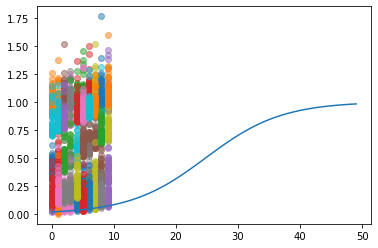

In [28]:
plt.plot(prior_checks['mu_y'].T[:,2])
for tp in [key for key in prior_rts.keys() if 'y_' in key]:
    
    plt.scatter([int(tp[-1])]*len(prior_rts[tp]), prior_rts[tp], alpha = 0.5, marker = 'o')
    